In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import pickle
from geopy.geocoders import Nominatim


# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import requests
from keplergl import KeplerGl

# soporte para limpieza
import sys
sys.path.append("../")

import src.soporte as sp

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (15,10)

In [2]:
dif = pd.read_csv("../data/grades_conversion_table.csv", index_col=0)

In [22]:
dif.head(3)

,grade_id,grade_fra
0,0,-
1,1,-
2,2,-


In [5]:
mountain = pd.read_csv("../data/routes2.csv", index_col=0)

In [26]:
mountain.head(3)

,name_id,name,grade_mean,cluster,coord,lat,lon,pais
0,0,diagonal de la x,49.250000,3,"(-31.6262496, -64.4437191)",-31.626250,-64.443719,Argentina
1,1,mehir,49.000000,2,"(33.4308245, 46.4636819)",33.430824,46.463682,ایران
2,3,tenedor libre,44.333333,3,"(-26.4537501, -54.6440551)",-26.453750,-54.644055,Argentina


In [4]:
scaler = pd.read_csv("../data/climber_df.csv", index_col=0)

In [28]:
scaler.head(3)

,user_id,country,sex,height,weight,age,years_cl,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
0,1,SWE,0,177,73,41.0,21,84,36,55,62,46.750000,1999,2001
1,3,SWE,0,180,78,44.0,22,12,53,51,59,52.833333,1999,2000
2,4,SWE,1,165,58,33.0,16,119,53,49,64,53.890756,2004,2009


In [60]:
scaler_country = scaler.groupby("country")["grades_max"].median().reset_index()
scaler_country = scaler_country[(scaler_country["country"] != "other")].sort_values(by = "grades_max", ascending=False)
# scaler_country.sort_values(by = "grades_max", ascending=False)

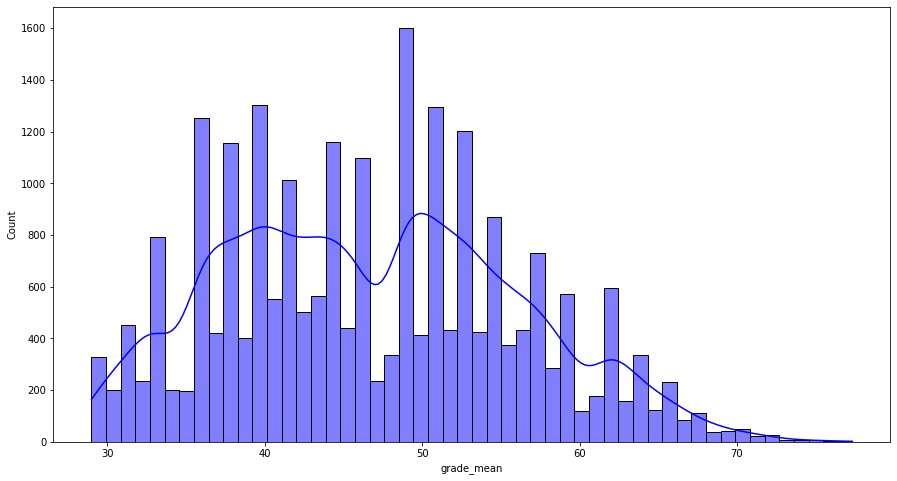

In [5]:
plt.figure(figsize=(15,8))
sns.histplot(mountain["grade_mean"], 
             kde = True, 
             color = "blue");

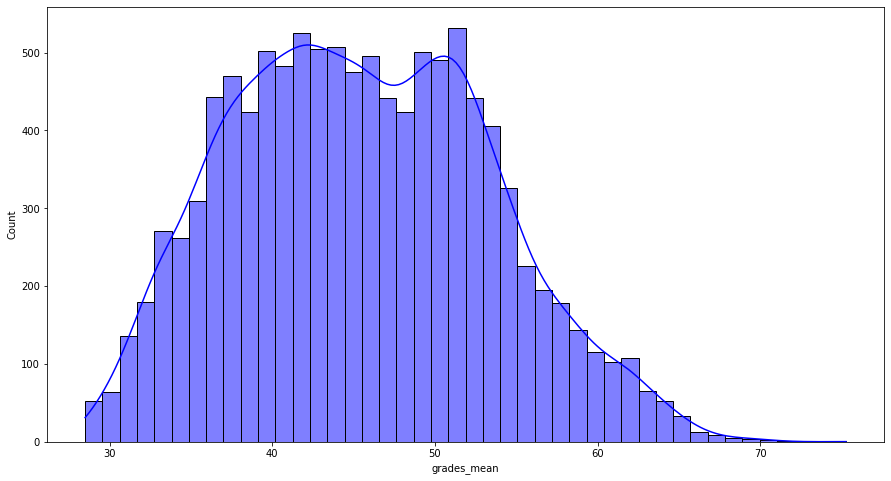

In [6]:
plt.figure(figsize=(15,8))
sns.histplot(scaler["grades_mean"], 
             kde = True, 
             color = "blue");

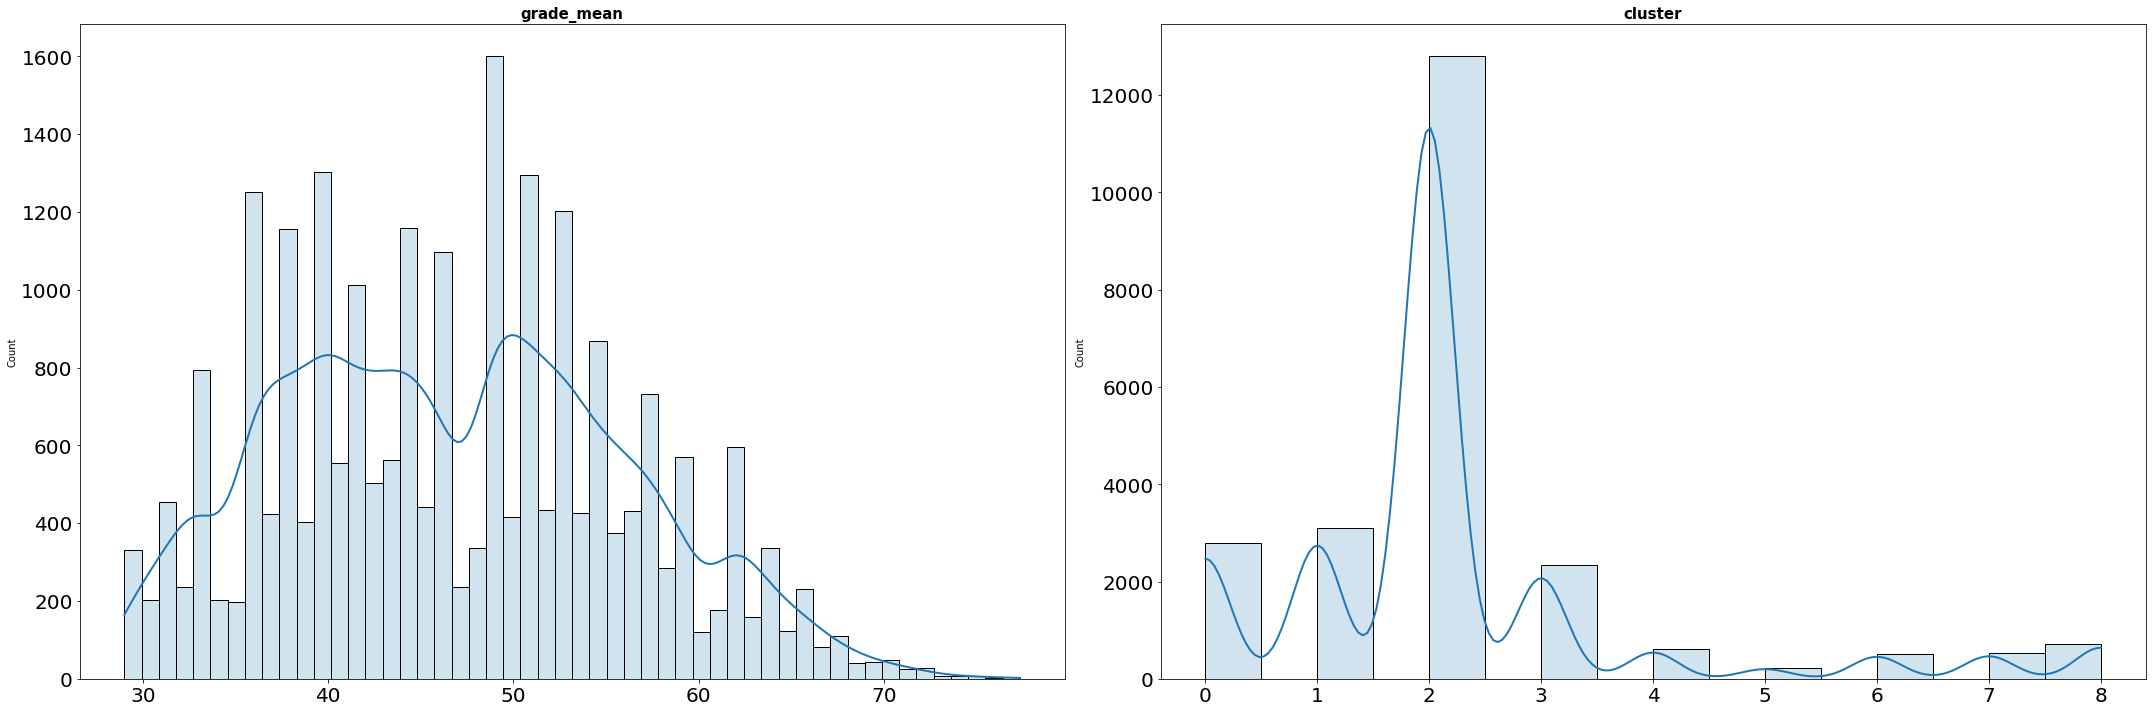

In [31]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))

axes = axes.flat

columnas_numeric = mountain.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric[1:3]): 
    sns.histplot(
        data = mountain,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
# fig.delaxes(axes[0])

fig.tight_layout()

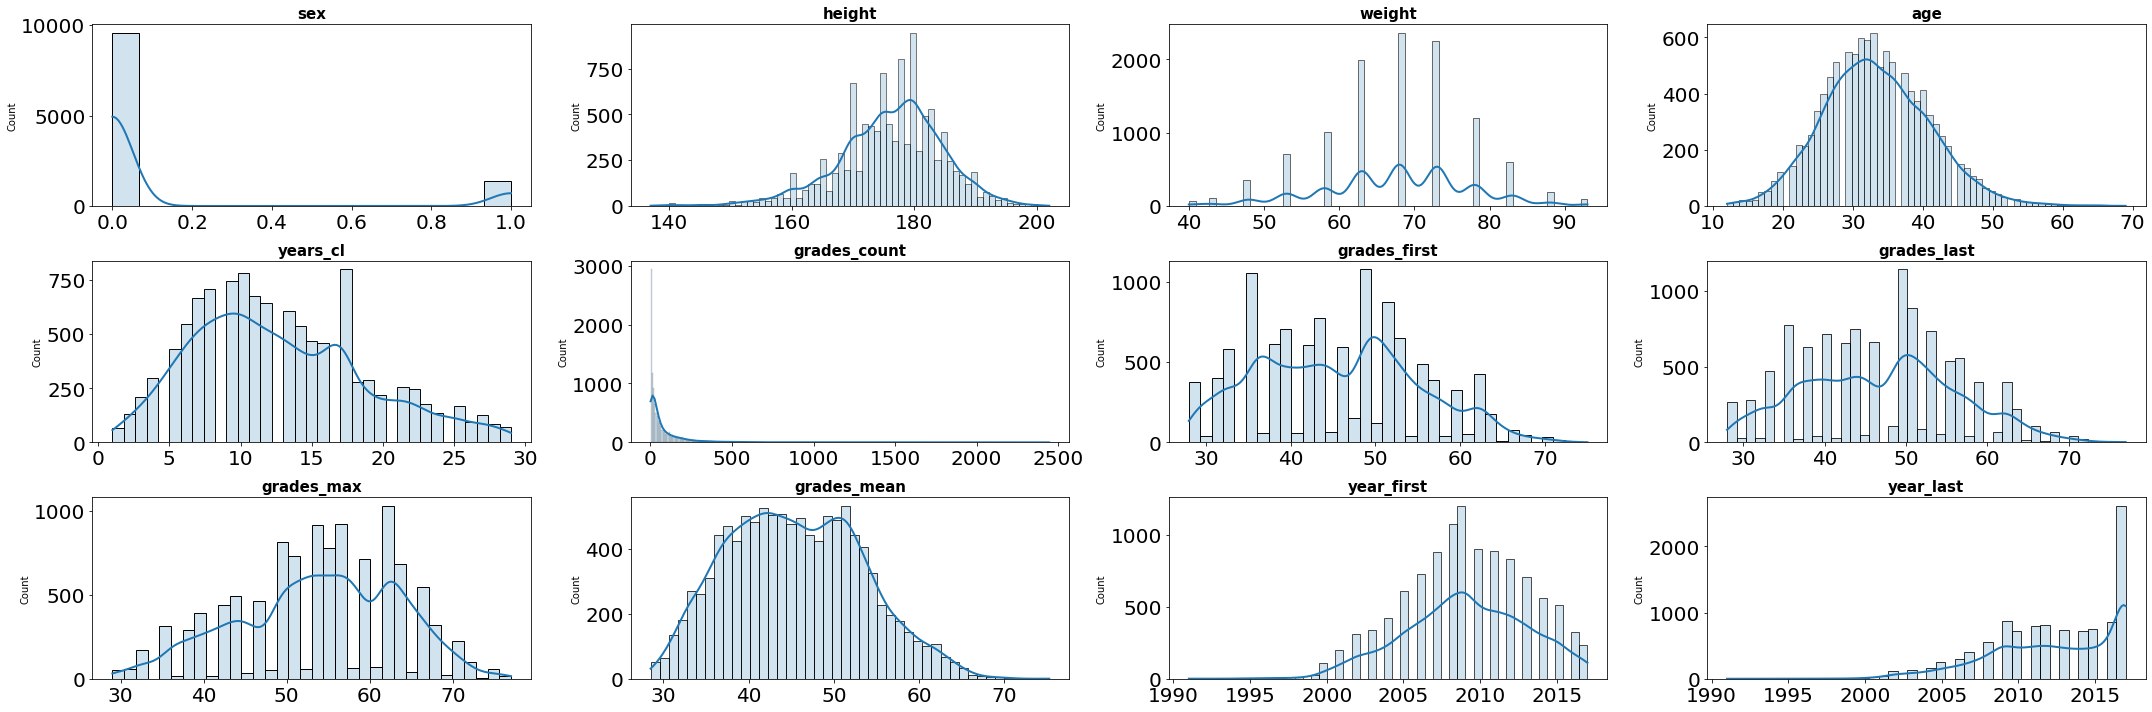

In [32]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (30, 10))

axes = axes.flat

columnas_numeric = scaler.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric[1:]): 
    sns.histplot(
        data = scaler,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

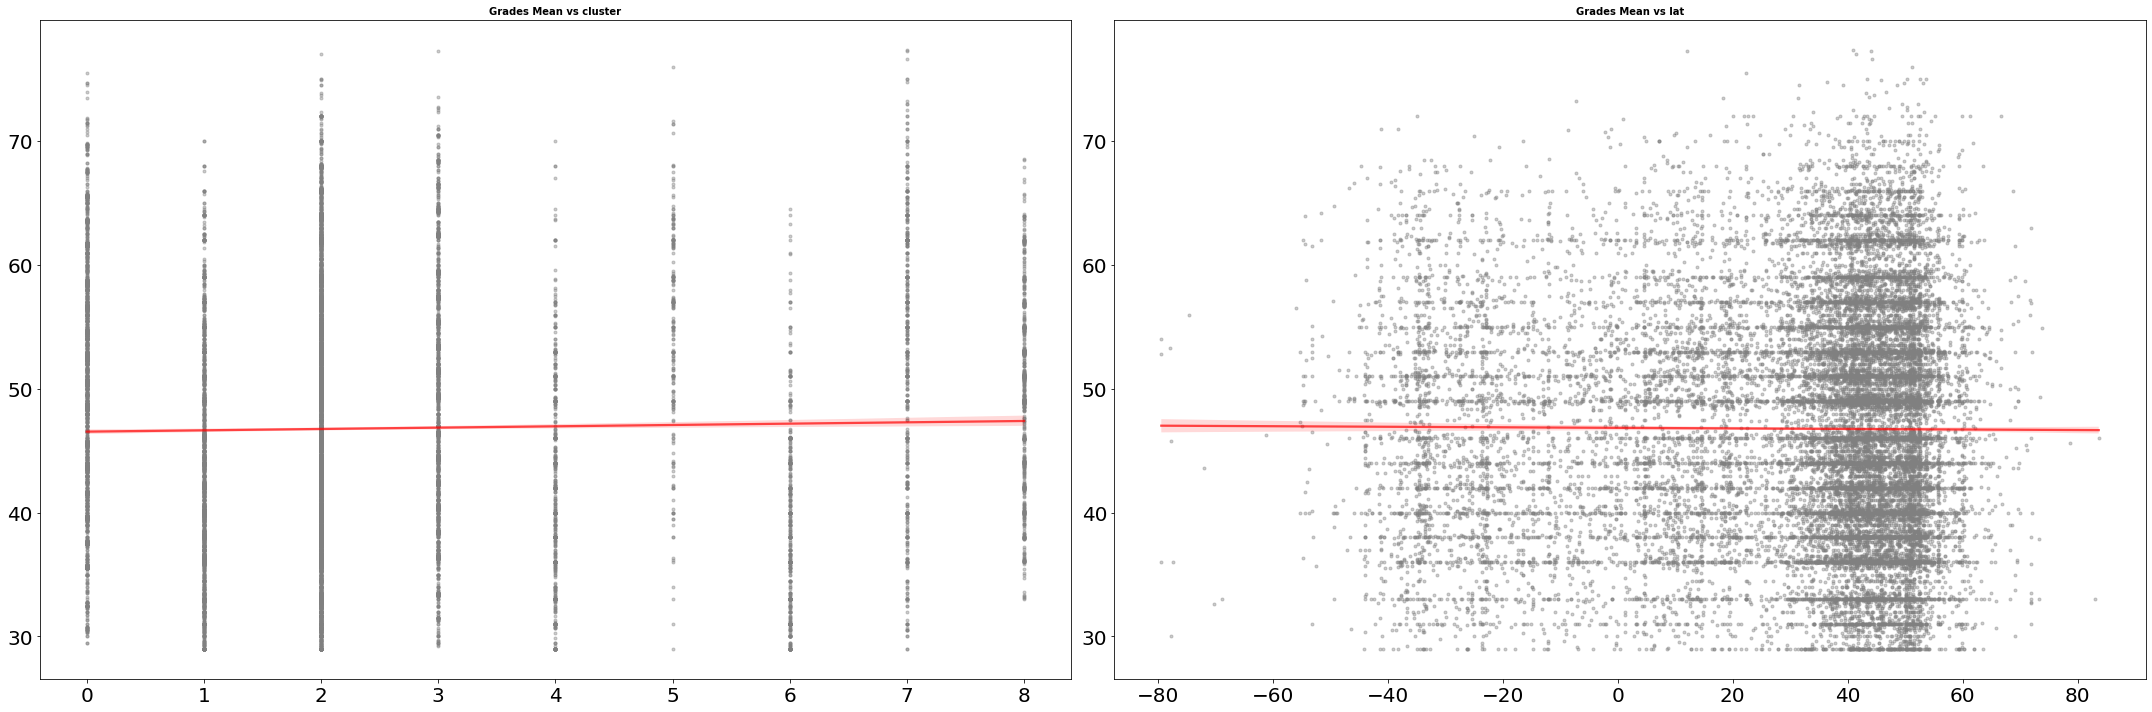

In [35]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))

axes = axes.flat

columnas_numeric = mountain.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("grade_mean")

for i, colum in enumerate(columnas_numeric[1:3]):
    sns.regplot(
        x = mountain[colum], 
        y = mountain["grade_mean"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Grades Mean vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

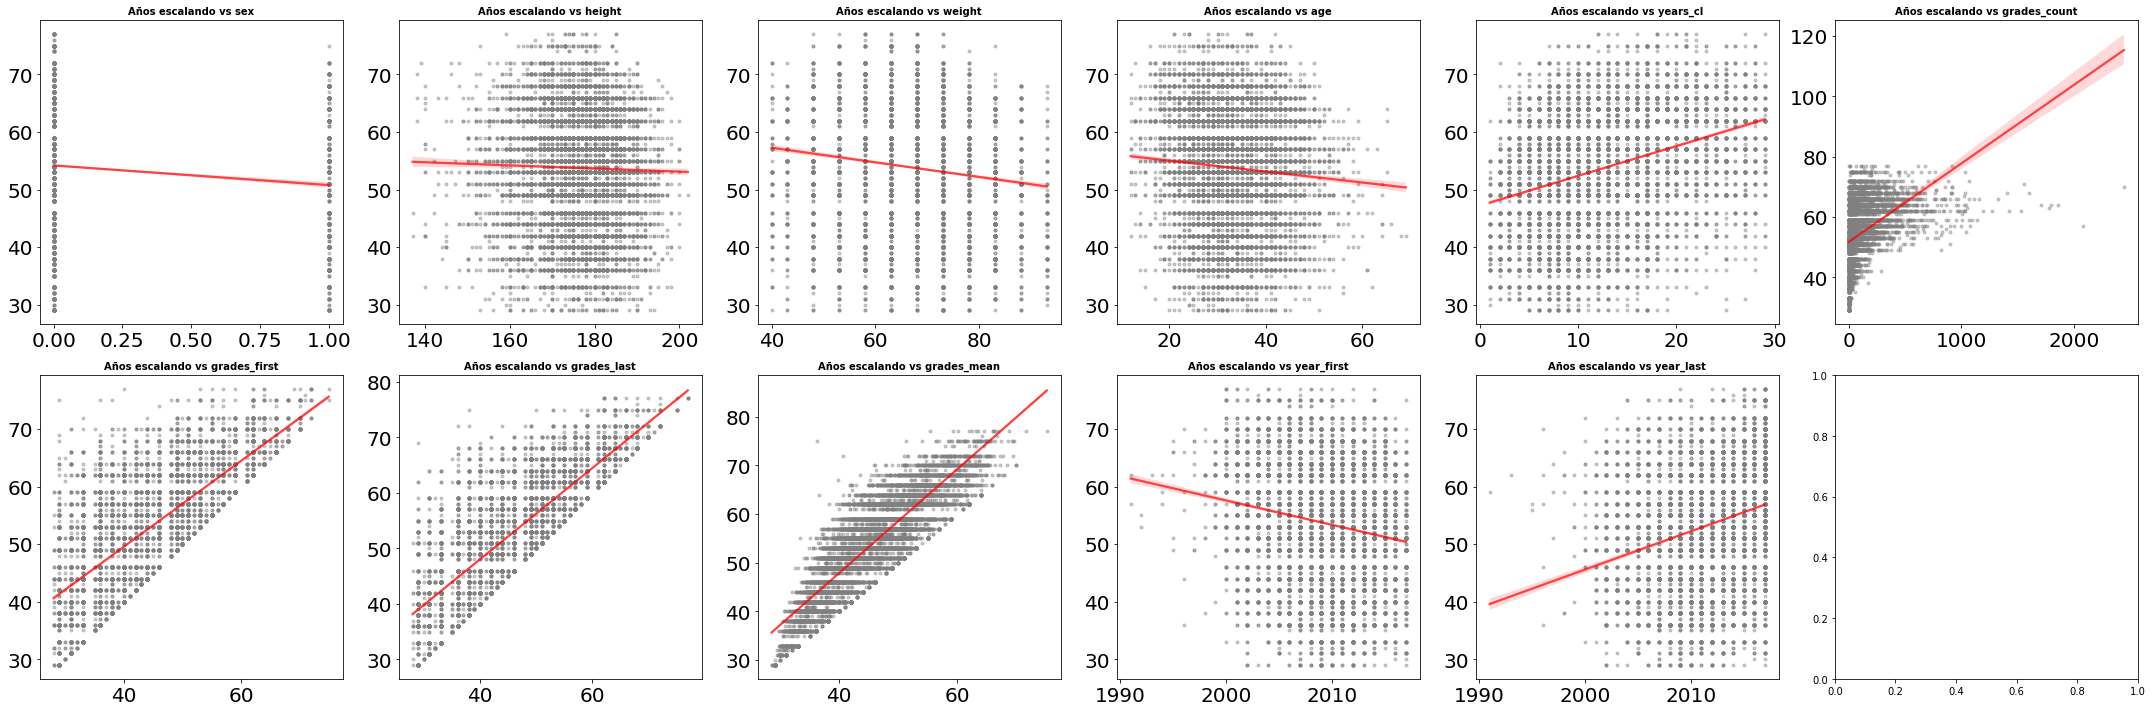

In [36]:
fig, axes = plt.subplots(nrows = 2, ncols = 6, figsize = (30, 10))

axes = axes.flat

columnas_numeric = scaler.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("grades_max")

for i, colum in enumerate(columnas_numeric[1:]):
    sns.regplot(
        x = scaler[colum], 
        y = scaler["grades_max"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Años escalando vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

In [63]:
scaler_country = scaler.groupby(columna)["grades_max"].median().reset_index()
scaler_country = scaler_country.sort_values(by = "grades_max", ascending=False)

# plt.figure(figsize = (15, 6))

# creación barplot

df = scaler_country.copy()

px.scatter(df, x= columna, y= 'grades_max',
           labels={'grades_max': "Máximo", # para cambiar el nombre de los ejes
                        columna: original}, 
              title=f'Median por {columna}') # es como el hue del scatterplot


Text(0, 0.5, 'precio total')

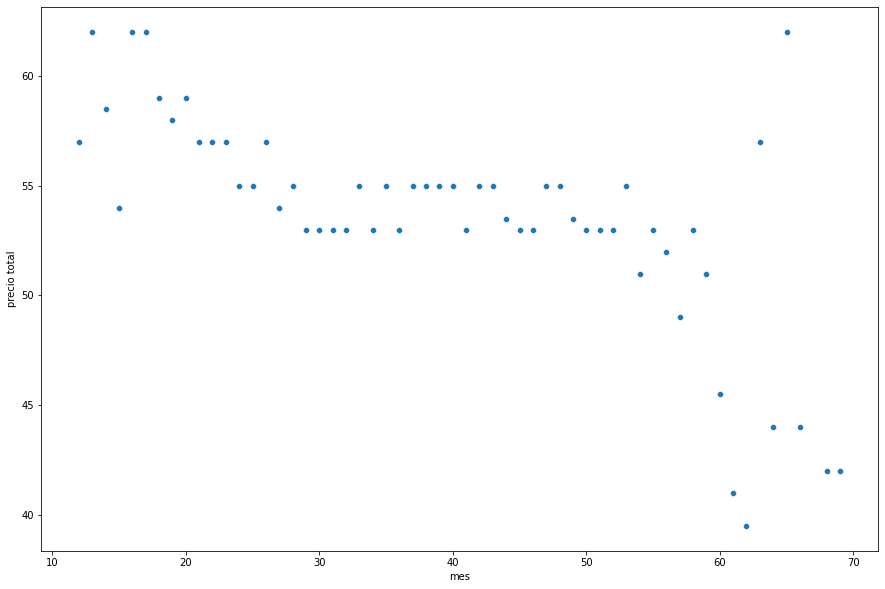

In [66]:
sns.scatterplot(data=df, x=columna, y="grades_max")

plt.title(f"Máximo grado por {orignal}")
plt.xlabel(original) # para poner etiqueta en el eje x
plt.ylabel("Máximo Grado") # para poner etiqueta en el eje y



<BarContainer object of 10 artists>

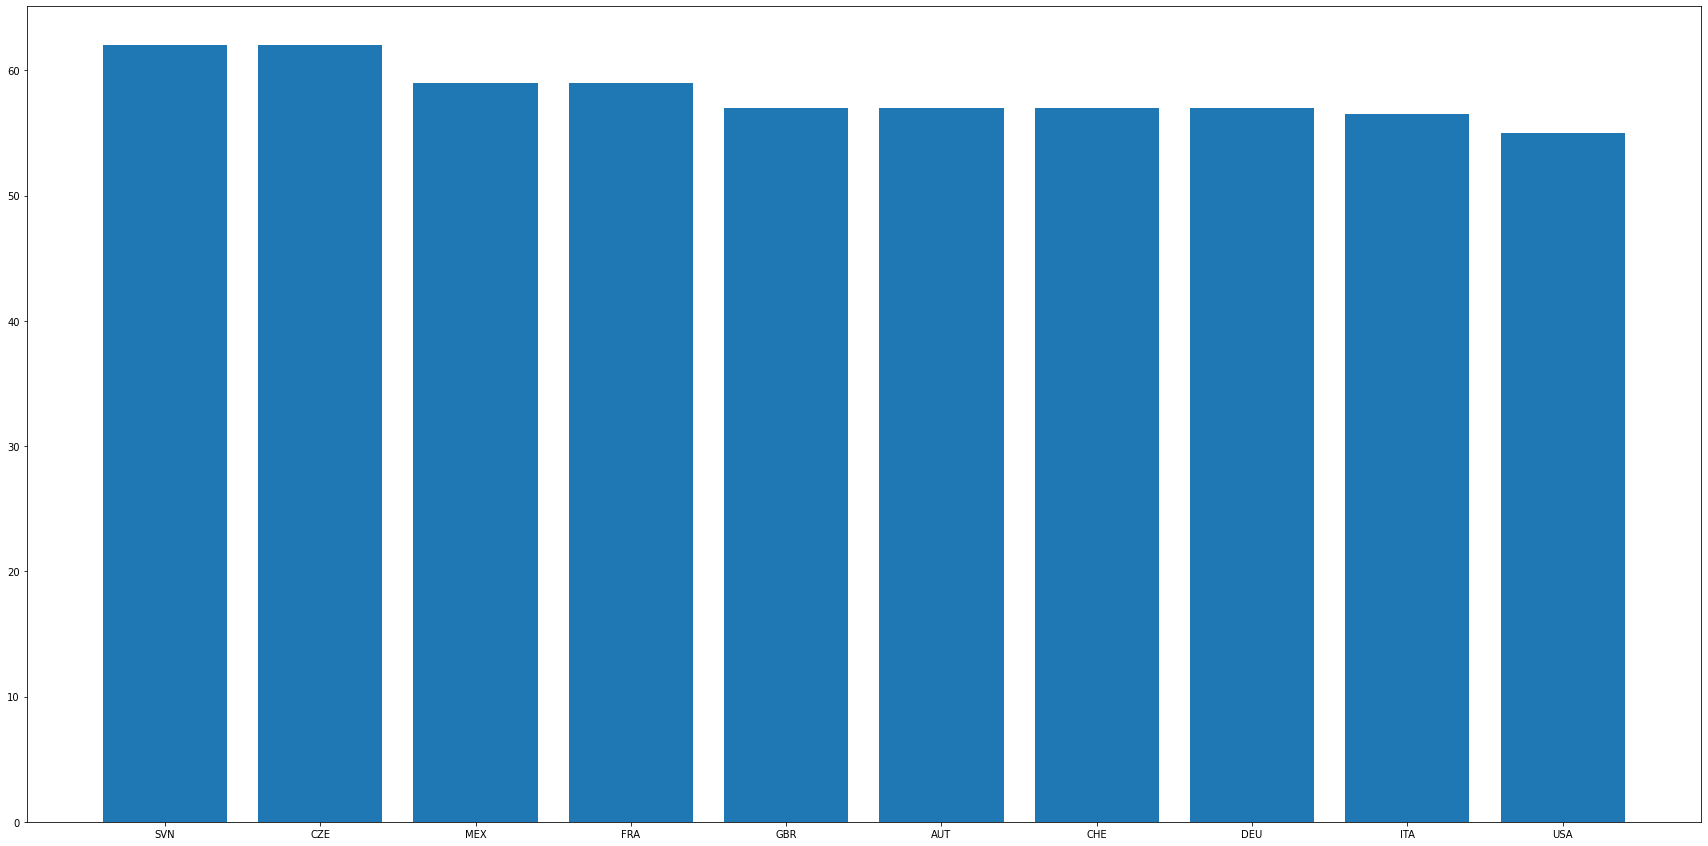

In [71]:
scaler_country = scaler.groupby("country")["grades_max"].median().reset_index()
scaler_country = scaler_country[(scaler_country["country"] != "other")].sort_values(by = "grades_max", ascending=False)
# scaler_country.sort_values(by = "grades_max", ascending=False)

fig = plt.figure(figsize = (30, 15))
 
# creating the bar plot

df = scaler_country.head(10)

plt.bar(df["country"], df["grades_max"])

<BarContainer object of 10 artists>

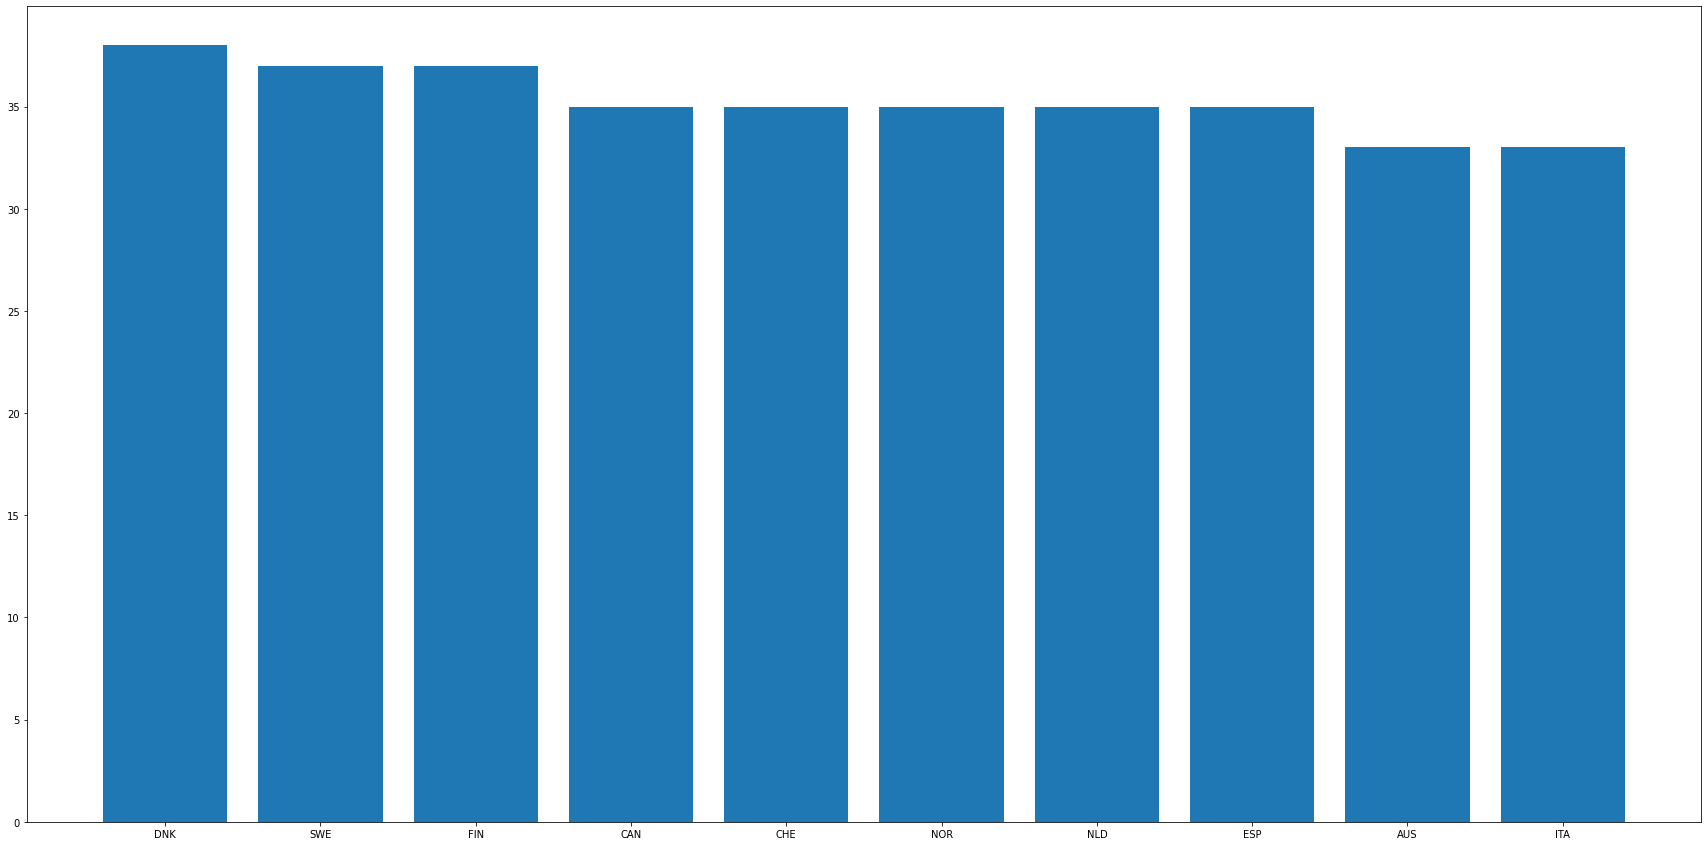

In [72]:
scaler_country = scaler.groupby("country")["age"].median().reset_index()
scaler_country = scaler_country.sort_values(by = "age", ascending=False)
# scaler_country.sort_values(by = "grades_max", ascending=False)

fig = plt.figure(figsize = (30, 15))
 
# creating the bar plot

df = scaler_country.head(10)


plt.bar(df["country"][:10], df["age"])

<BarContainer object of 10 artists>

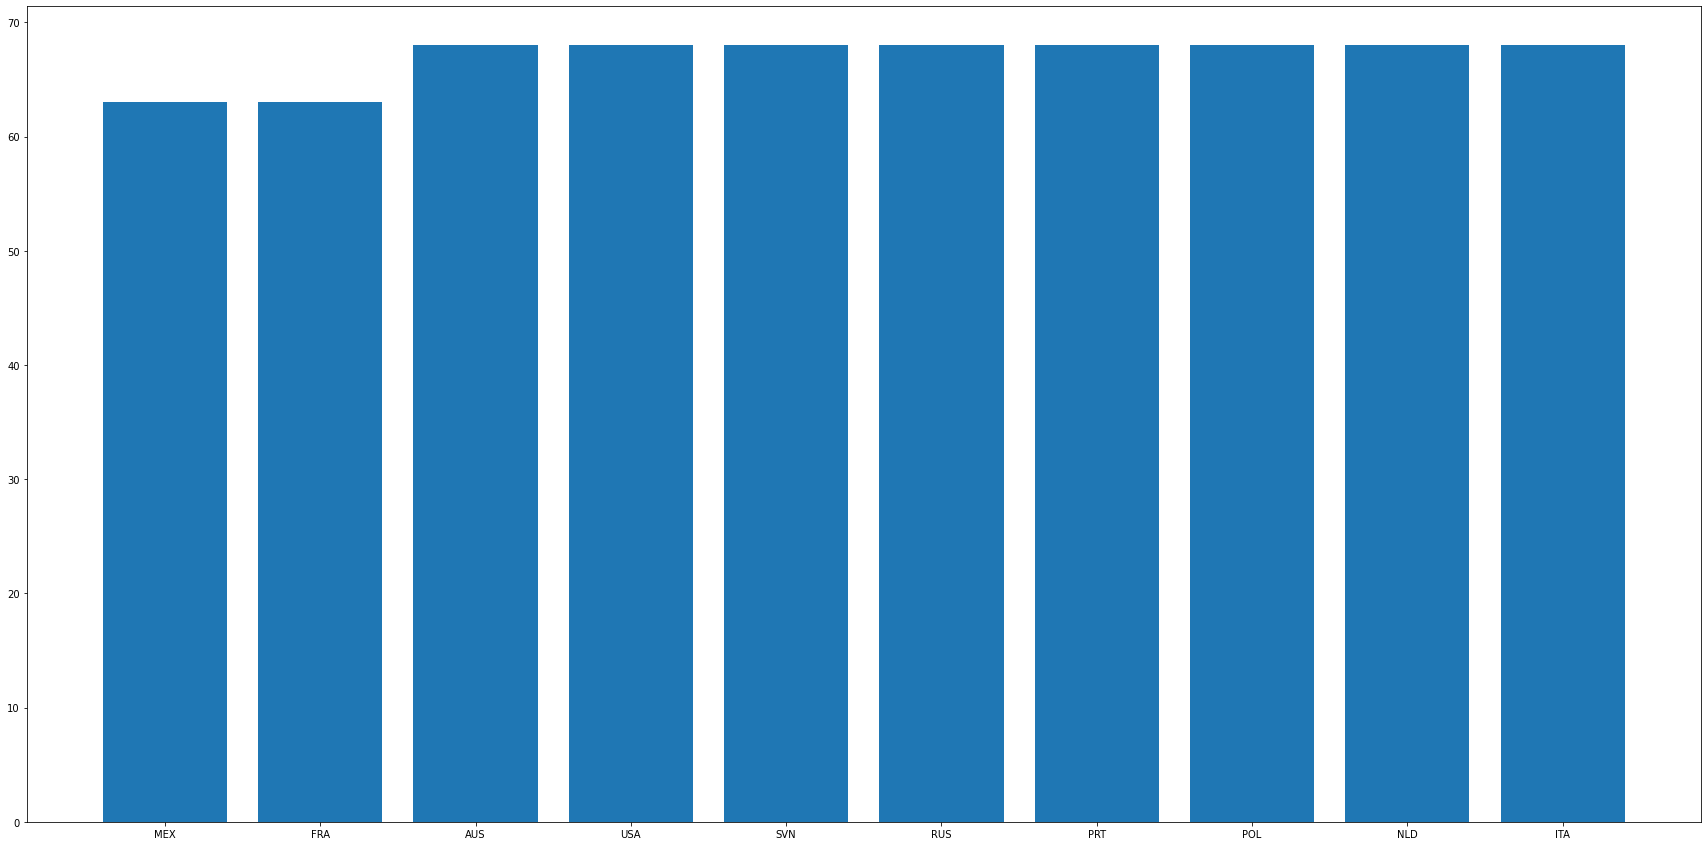

In [78]:
scaler_country = scaler.groupby("country")["weight"].median().reset_index()
scaler_country = scaler_country.sort_values(by = "weight", ascending=True)
# scaler_country.sort_values(by = "grades_max", ascending=False)

fig = plt.figure(figsize = (30, 15))
 
# creating the bar plot

df = scaler_country.head(10)


plt.bar(df["country"], df["weight"])

<BarContainer object of 10 artists>

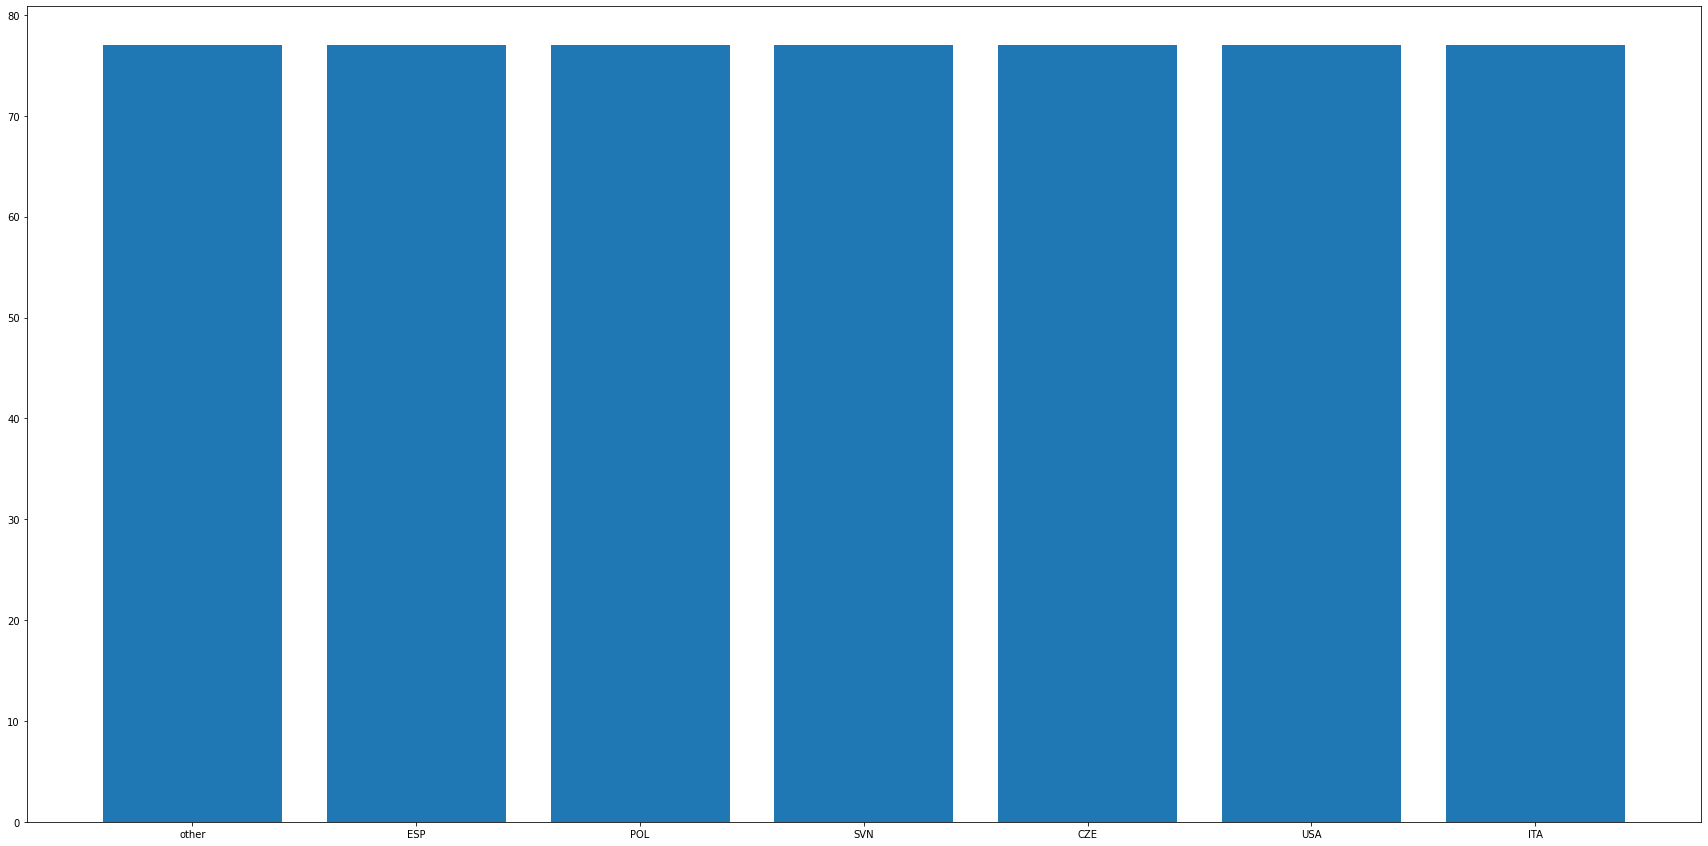

In [16]:
best_sacler = scaler[(scaler["age"] < 40) & (scaler["weight"] <=70) & (scaler["years_cl"] >= 10)]
best_sacler["grades_max"]

df = best_sacler.sort_values(by = "grades_max", ascending=False).head(10)
fig = plt.figure(figsize = (30, 15))

plt.bar(df["country"], df["grades_max"])

In [17]:
best_sacler = scaler[(scaler["age"] < 40) & (scaler["weight"] <=70) & (scaler["years_cl"] >= 10) & (scaler["country"] =="MEX")]
best_sacler["grades_max"].median()

59.0

In [18]:
best_sacler = scaler[(scaler["age"] < 40) & (scaler["weight"] <=70) & (scaler["years_cl"] >= 10) & (scaler["country"] =="FRA")]
best_sacler["grades_max"].median()

62.0

Se conidera un escalador de muy alto nivel cuando puedes superar una montana de grado <b>8b</b>

In [95]:
dif["grade_fra"][best_sacler["grades_max"].median()]

'9b'

In [102]:
dif["grade_fra"][scaler["grades_max"].median()]

'7b+'

In [41]:
mountain.head()

,name_id,name,grade_mean,cluster,coord,lat,lon,pais
0,0,diagonal de la x,49.250000,3,"(-31.6262496, -64.4437191)",-31.626250,-64.443719,Argentina
1,1,mehir,49.000000,2,"(33.4308245, 46.4636819)",33.430824,46.463682,ایران
2,3,tenedor libre,44.333333,3,"(-26.4537501, -54.6440551)",-26.453750,-54.644055,Argentina
3,5,barbaroja,49.000000,1,"(-26.18040775, -58.174570446864095)",-26.180408,-58.174570,Argentina
4,7,jack sparrow,51.000000,1,"(56.1161043, 10.2233217)",56.116104,10.223322,Danmark


In [18]:
mountain["pais"].value_counts()

United States                       3926
España                              1707
France                              1623
Italia                              1604
Deutschland                         1585
                                    ... 
McMurdo Station                        1
Micronesia                             1
Saint Vincent and the Grenadines       1
Troll                                  1
Ascension and Tristan da Cunha         1
Name: pais, Length: 206, dtype: int64

<p>Al tener tantos paises y algunos con solo una montaña esto afectar a el congunto global de los datos ya que no hay mustras suficientes para hacer una analisis preciso de estos. Se ha decidido coger los 30 paises con mas montañas.</p>

In [81]:
mon_limp = mountain["pais"].value_counts()[:31].reset_index()
lista = mon_limp["index"].to_list()

In [82]:
new_mon = mountain[mountain["pais"].isin(lista)]

In [62]:
new_mon.shape

(19443, 8)

<BarContainer object of 10 artists>

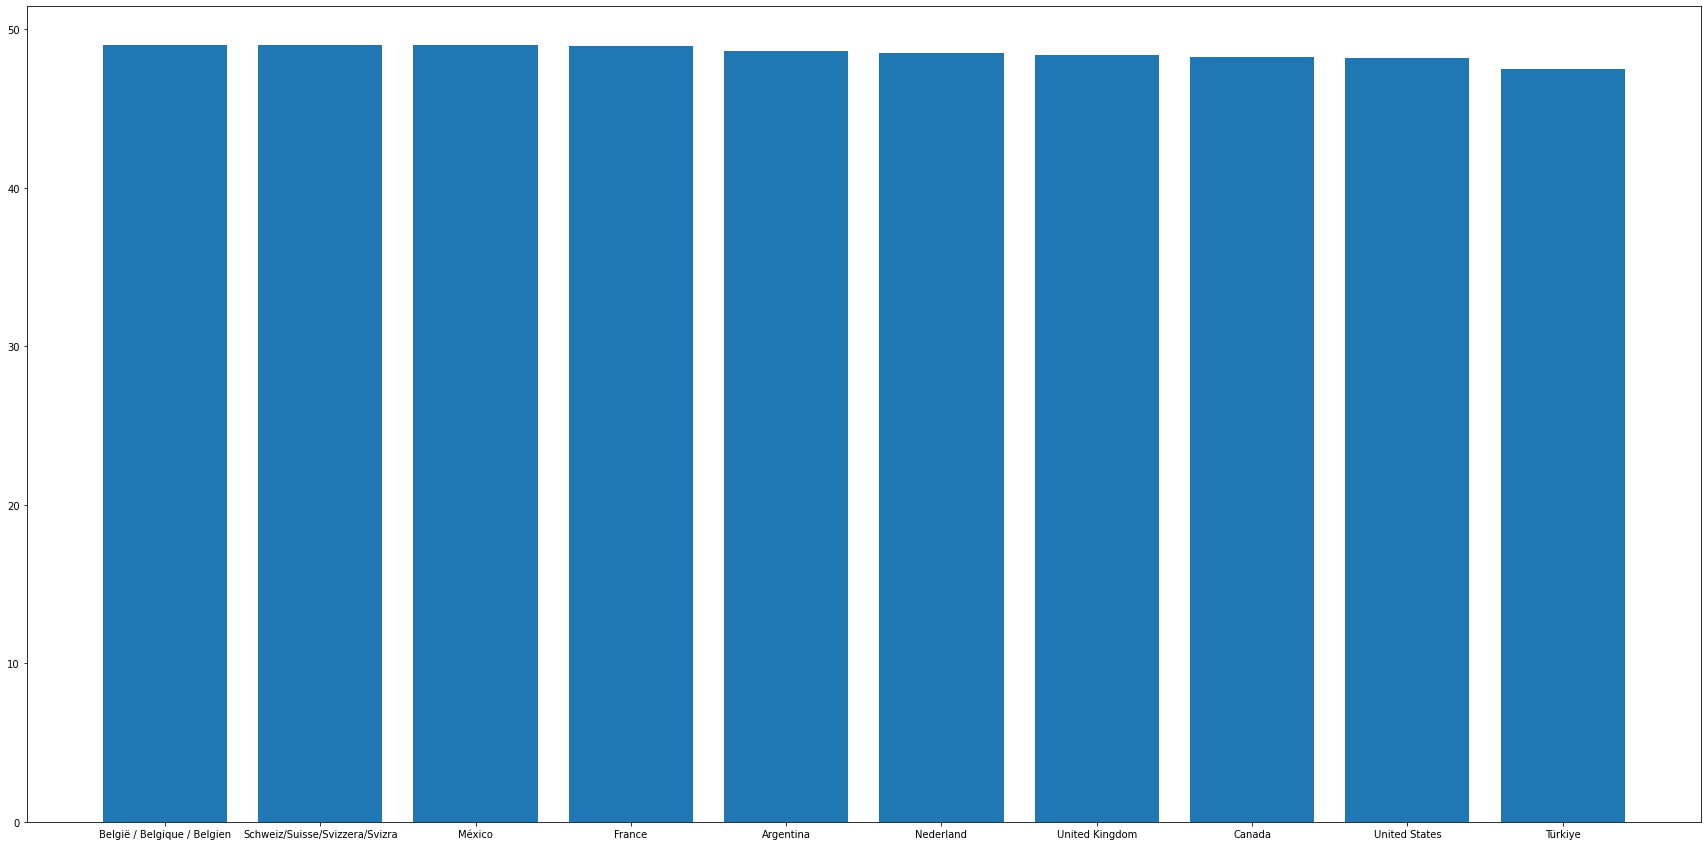

In [33]:
mountain_country = new_mon.groupby("pais")["grade_mean"].median().reset_index()
df = mountain_country.sort_values(by = "grade_mean", ascending=False).head(10)

fig = plt.figure(figsize = (30, 15))
 
# creating the bar plot

# df = mountain_country.head(10)

plt.bar(df["pais"], df["grade_mean"])

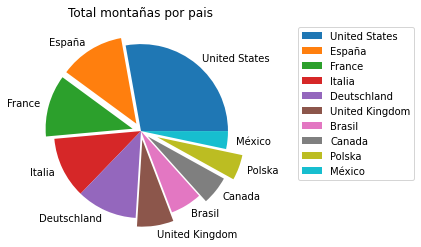

In [84]:
mon_limp_10 = mon_limp[:10]

explode = (0, 0.1 ,0.1, 0, 0, 0.1, 0, 0.1, 0.2, 0) # para sacar los quesitos hacia fuera

plt.pie(mon_limp['pais'],
       labels = mon_limp["index"],
       explode = explode)  # para sacar los quesitos hacia fuera

plt.title("Total montañas por pais") # para poner el título
plt.legend(bbox_to_anchor=(1.2, 1)) # sacar leyenda y donde colocarla. El primer índice (derecha-izquierda), segundo índice(arriba, abajo) )
plt.show();

In [88]:
fig = plt.figure(figsize = (30, 15))

fig = px.pie(mon_limp, values='pais', names='index', 
            title='Total montañas por pais', # poner el título de la figura
            color_discrete_sequence = px.colors.sequential.haline, # para elegir la escala de colores
            )
fig.show()

<Figure size 2160x1080 with 0 Axes>

In [6]:
map=KeplerGl(height=800, data={"DENUE":mountain},show_docs=False)
map

KeplerGl(data={'DENUE':        name_id                 name  grade_mean  cluster  \
0            0     diagona…

In [3]:
#Obtener y almacenar la configuración del mapa ajustado
config=map.config
#Guardar el mapa con la configuración generada
map=KeplerGl(height=800, data={"DENUE":df},show_docs=False, config=config)

'No autorizado. Utilice una clave válida.'

In [ ]:
'https://kepler.gl/demo/map?mapUrl=https://dl.dropboxusercontent.com/s/gza65n7ap5snbur/keplergl_snuujzh.json'

In [13]:
# Configurar el mapa para usar hexágonos
config = {
    'version': 'v1',
    'config': {
        'mapState': {
            'latitude': mountain['lat'],
            'longitude': mountain['lon'],
            'zoom': 4
        },
        'visState': {
            'layers': [{
                'type': 'hexagon',
                'config': {
                    'dataId': 'data_1',
                    'label': 'Hexbin',
                    'columns': {
                        'lat': 'lat',
                        'lng': 'lon'
                    },
                    'isVisible': True,
                    'visConfig': {
                        'opacity': 0.8,
                        'worldUnitSize': 10,
                        'resolution': 8,
                        'colorRange': {
                            'name': 'Uber Viz Diverging 1',
                            'type': 'diverging',
                            'category': 'Uber',
                            'colors': ['#00939C', '#5DBABF', '#BAE1E2', '#F8C0AA', '#DD7755', '#C22E00']
                        },
                        'coverage': 1,
                        'sizeRange': [0, 500],
                        'percentile': [0, 100],
                        'elevationPercentile': [0, 100],
                        'elevationScale': 500,
                        'colorAggregation': 'count',
                        'sizeAggregation': 'average',
                        'enable3d': True
                    }
                },
                # Configurar la altura de los hexágonos en función de la columna "grade_mean"
                # y el color en función del conteo de puntos
                'visualChannels': {
                    'colorField': {'name': None},
                    'colorScale': None,
                    'sizeField': {'name':'grade_mean'},
                    'sizeScale':'linear'
                }
            }],
            # Configurar la fuente de datos para la capa
            # y establecer la columna "grade_mean" como medida
            # para la altura de los hexágonos
            "filters": [],
            "interactionConfig": {},
            "layerBlending": "normal",
            "splitMaps": []
        }
    }
}

map_1 = KeplerGl(height=800, data={'pais': mountain}, config=config)

# Mostrar mapa
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'mapState': {'latitude': 0       -31.626250
1        33.430824
2 …

In [15]:
# Crear mapa con KeplerGl
map_1 = KeplerGl(height=400)

# Configurar el mapa para usar hexágonos
config = {
    'version': 'v1',
    'config': {
        'mapState': {
            'latitude': mountain['lat'].mean(),
            'longitude': mountain['lon'].mean(),
            'zoom': 4
        },
        'visState': {
            'layers': [{
                'type': 'hexagon',
                'config': {
                    'dataId': 'data_1',
                    'label': 'Hexbin',
                    'columns': {
                        'lat': 'lat',
                        'lng': 'lon'
                    },
                    'isVisible': True,
                    'visConfig': {
                        'opacity': 0.8,
                        'worldUnitSize': 10,
                        'resolution': 8,
                        'colorRange': {
                            'name': 'Uber Viz Diverging 1',
                            'type': 'diverging',
                            'category': 'Uber',
                            'colors': ['#00939C', '#5DBABF', '#BAE1E2', '#F8C0AA', '#DD7755', '#C22E00']
                        },
                        'coverage': 1,
                        'sizeRange': [0, 500],
                        'percentile': [0, 100],
                        'elevationPercentile': [0, 100],
                        'elevationScale': 500,
                        'colorAggregation': 'count',
                        'sizeAggregation': 'average',
                        'enable3d': True
                    }
                },
                # Configurar la altura de los hexágonos en función de la columna "grade_mean"
                # y el color en función del conteo de puntos
                'visualChannels': {
                    'colorField': {'name':'grade_mean'},
                    'colorScale':'quantize',
                    'sizeField':{'name':'grade_mean'},
                    'sizeScale':'linear'
                }
            }],
            # Configurar la fuente de datos para la capa
            # y establecer la columna "grade_mean" como medida
            # para la altura de los hexágonos
            "filters": [],
            "interactionConfig": {},
            "layerBlending": "normal",
            "splitMaps": []
        }
    }
}

# Agregar datos al mapa
map_1.add_data(data=mountain, name="data_1")

# Aplicar configuración al mapa
map_1.config = config

# Mostrar mapa en Streamlit
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'mapState': {'latitude': 31.81891358040066, 'longitude': -10.1766…